<a href="https://colab.research.google.com/github/AbhinavRao23/speedchallenge/blob/master/testbench.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#general
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import random

#image
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

#ANN shit
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


#CNN shit
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

#analysis
from tensorflow.keras.models import Model

In [19]:
def readFile(fileName):
        fileObj = open(fileName, "r") #opens the file in read mode
        words = fileObj.read().splitlines() #puts the file into an array
        fileObj.close()
        numbers = [float(i) for i in words]
        return words, numbers

In [20]:
url = 'drive/My Drive/Projects/speedchallenge/data/train.txt'
arr,y_train  = readFile(url)

In [21]:
cap = cv2.VideoCapture('drive/My Drive/Projects/speedchallenge/data/train.mp4')

In [22]:
ret = True
n_batch = 10
frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

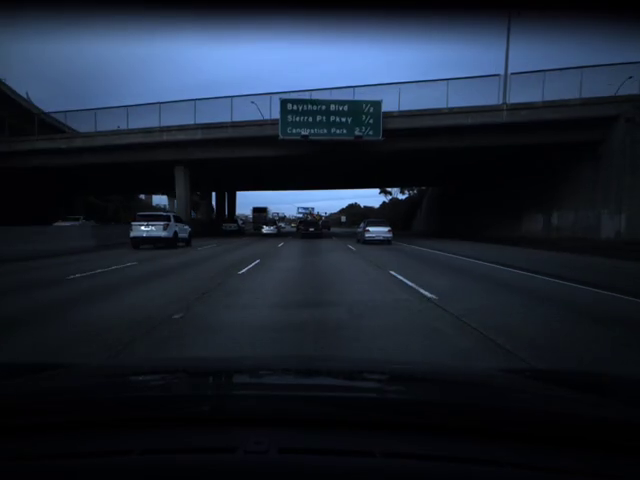

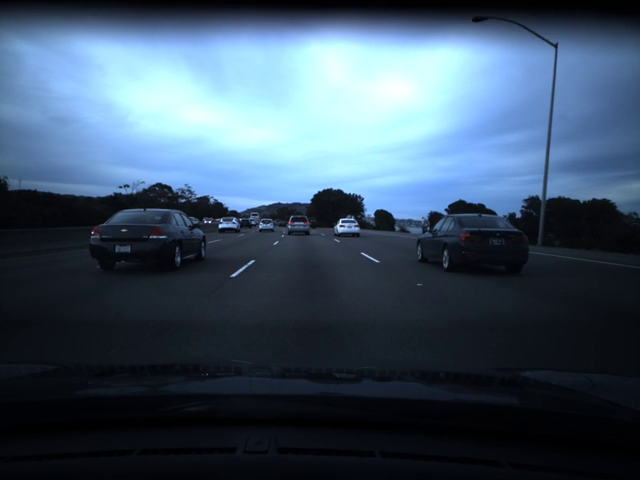

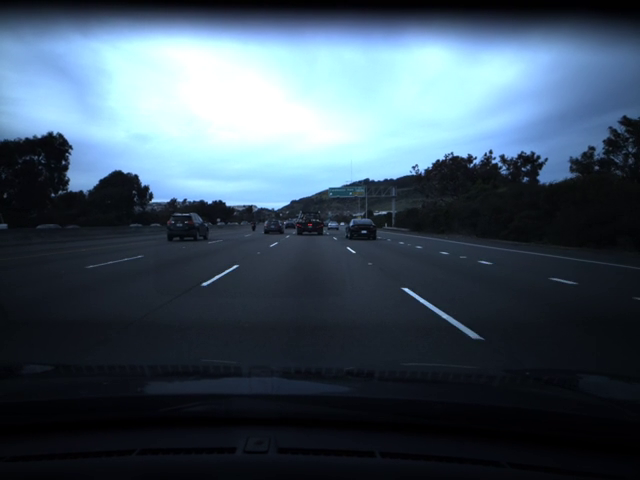

In [24]:
for i in range(n_batch):
  prox = np.empty((frames//n_batch, height, width, 3), np.dtype('uint8')) #batchwise x_train proxy
  fc = 0 #frame count initialise
  fs = i*frames//n_batch #start at this frame
  cap.set(cv2.CAP_PROP_POS_FRAMES, fs) #sets starting frame

  while (fc < frames//n_batch and ret):
      ret, prox[fc] = cap.read()
      fc += 1
  
  x = prox
  y = y_train[i*frames//n_batch:(i+1)*frames//n_batch]
  # cv2_imshow(x[1,:,:,:])